# Overview

### Has the network latency gone up since we switched internet service providers?

$H_0:$  Mean latency in the three months after switiching internet service providers is less than or equal to mean latency in the three months before internet service providers. 

$H_a:$ Mean latency in the three months after switching internet service providers is greater than mean latency in the three months before switching internet service providers.

**Type I Error**: To test this hypothesis, we sampled a group of people. Within our sample group, average latency for three months after switching internet service providers is greater than latency for three months before switching internet service providers, but the overall population experienced a decrease or no change in latency after switching internet service providers.

**Type II Error**: To test our hypothesis, we sampled a group of people. Within our sample group, average latency for three months after switching internet service providers is less than the average latency for three months before switching internet service providers. The overall population, however, experienced an average increase in latency after switching internet service providers. 

### Is the website redesign any good?

$H_0:$ The mean click-through rate in the six months before the website redesign is equal to or greater than the mean click-through rate in the six months after the website redesign.

$H_a:$ The mean click-through rate in the six months before the website redesign is less than the mean click-through rate in the six months after the website redesign. 

**Type I Error**: To sample our hypothesis, we sampled the website's mean click rates for users in a set number of areas. Of the areas we sampled, the mean click through rate for the six months before the website redesign was less than the mean click through rate for the six months after the website redesign. However, the mean click rate of users in all areas shows an increase in the click through rate since the website redesign. 

**Type II Error**: To sample our hypothesis, we sampled the website's mean click rate for a set number of areas. Of the areas we sampled, the mean click through rate for the six months before the website redesign was greater than the click through rate for the six months after the website redesign. However, the mean click rate of all days shows no change in the click through rate since website redesign. 

### Is our television ad driving more sales?


$H_0:$ The mean sales rate in the six months before the television advertisement campaign began is greater than or equal to the mean sales rate in the six months after the television campaign began. 

$H_{a}:$ The mean sales rate in the six months before the television advertisement campaign began is less than the mean sales rate in the six months after the television campaign began. 

**Type I Error**: To test this hypothesis we sampled sales figures for a six month period in a set number of locations. In the sampled locations, the mean number of sales in the six months before the television advertising campaign began was less than the mean number of sales in the six months after the television advertising campaign began. 

However, in the whole market, sales rates remained the same after the television advertising campaign began. 

**Type II Error**: To test this hypothesis, we sampled the sales figures in a set number of locations. In the sampled locations, the mean number of sales in the six months before the television advertising campaign began was greater than the mean number of sales in the six months after the television advertising campaign began. 

However, in the whole market, sales decreased after the television advertising campaign began.

# T-test

We will import the datasets that we may need.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pydataset import data
from numpy import random
import seaborn as sns
import pandas as pd
from math import sqrt

## Question #1 

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.

A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days.

In [5]:
sample_size1 = 40
mean1 = 90
std1 = 15

A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days.

In [39]:
sample_size2 = 50
mean2 = 100
std2 = 20

Use a .05 level of significance.

In [20]:
level_of_significance = 0.05

**Formulate Hypotheses**

$H_0$: Average home sale time for Office #1 = average home sale time for Office #2.

$H_a$: Average home sale time for Office #1 $\ne$ average home sale time for Office #2.

**Generate a sample for Office #1**

In [42]:
office_1 = random.normal(mean1, std1, size= sample_size1)
office_1_pd = pd.DataFrame({'time': office_1})
office_1_pd

,time
0,86.123324
1,84.153832
2,96.903707
3,83.676943
4,83.120911
5,93.406062
6,79.651912
7,75.757755
8,79.192688
9,108.193117


**Generate a sample for Office #2**

In [41]:
office_2 = random.normal(mean2, std2, size = sample_size2)
office_2_pd = pd.DataFrame({'time': office_2})
office_2_pd

,time
0,99.758484
1,110.716631
2,107.092205
3,116.619462
4,97.405179
5,85.225475
6,52.216517
7,104.386959
8,88.912733
9,102.381490


**Graph of Office #1 sale times**

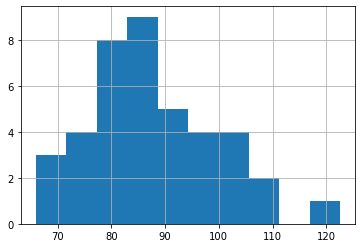

In [43]:
office_1_plot = office_1_pd['time'].hist()

**Graph of Office #2 sale times**

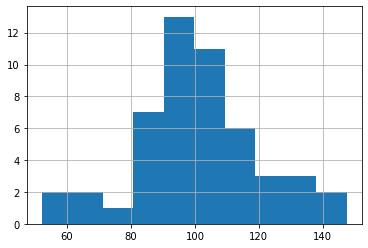

In [44]:
office_2_plot = office_2_pd['time'].hist()

These graphs look different to the eye, but we will still do a calculation to determine if there is a statistical difference.

**Check the variance**

In [45]:
print("Variance for Office 1:", office_1_pd['time'].var())
print("Variance for Office 2:", office_2_pd['time'].var())

Variance for Office 1: 161.83312208325577
Variance for Office 2: 387.8105155825484


These two variances are not equal, so we will set the argument of equal_var to False.

**Compute test statistic**

In [49]:
t, p = stats.ttest_ind(office_1_pd['time'], office_2_pd['time'], equal_var = False)
print("T-statistic:", t)
print("P-value:", p)

T-statistic: -3.9655517975022336
P-value: 0.00015269901123267235


We will now check whether $\frac{1}{2}p < 0.05$ and $t>0$.

In [55]:
print("Is p-value significant?", p < level_of_significance)
print("Is t-statistic greater than 0?", t > 0)

Is p-value significant? True
Is t-statistic greater than 0? False


**We will use the p-value and t-statistic to reach a conclusion.**

In [56]:
if p > level_of_significance:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis.")
    print("The average sale time for Office #1 is not equal to the average sale time for Office #2.")

We reject the null hypothesis.
The average sale time for Office #1 is not equal to the average sale time for Office #2.


## Question 2

Load the mpg dataset.

In [62]:
mpg_df = data("mpg")

In [63]:
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### Part 1

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

**Formulate fuel hypotheses**

$H_{0}:$ Average fuel efficiency in cars from 2008 = average fuel efficiency in cars from 1999. 

$H_{a}:$ Average fuel efficiency in cars from 2008 $\ne$ average fuel efficiency in cars from 1999. 

**Get data**

We will make a new column averaging the city mileage and highway mileage.

In [68]:
mpg_df["avg_mpg"] = (mpg_df.cty + mpg_df.hwy)/2
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


Now we can use this new column to compare mileages for 2008 and 1999 cars.

In [80]:
cars_2008_sample = mpg_df[mpg_df.year==2008].avg_mpg

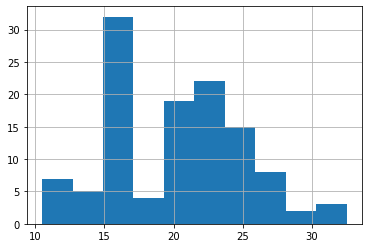

In [77]:
cars_2008_chart = cars_2008_sample.hist()

In [79]:
cars_1999_sample = mpg_df[mpg_df.year==1999].avg_mpg

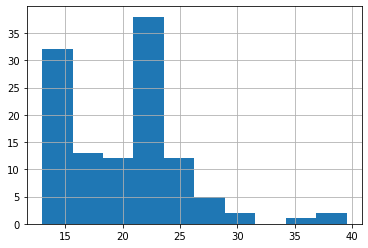

In [81]:
cars_1999_chart = cars_1999_sample.hist()

In [82]:
cars_2008_sample.mean()

20.076923076923077

In [83]:
cars_1999_sample.mean()

20.22222222222222

In [86]:
cars_2008_sample.size

117

In [87]:
cars_1999_sample.size

117

**Set alpha**

In [84]:
alpha = 0.05

**Verify Assumptions**

1. Independent Samples  YES! no observations in the 2008 sample exist in the 1999 sample.
2. Normal Distribution, or at least 30 observations and "kinda" normal.  Plenty of observations, 177 for each. 
3. Equal Variances (we have a method for dealing with unequal variances).

In [90]:
print("Variance for 2008 cars sample:", cars_2008_sample.var())
print("Variance for 1999 cars sample:", cars_1999_sample.var())

Variance for 2008 cars sample: 24.097480106100797
Variance for 1999 cars sample: 27.122605363984682


The variances are not equal, so we will set the argument of equal_var to False.

**Compute test statistic**

In [92]:
t, p = stats.ttest_ind(cars_2008_sample, cars_1999_sample, equal_var = False)
print("T-statistic:", t)
print("P-value:", p)

T-statistic: -0.21960177245940962
P-value: 0.8263750772060638


**Make a conclusion based on the data**

In [93]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  False
is t > 0?  False


In [96]:
if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
else:
    print("We reject the null hypothesis.")

We fail to reject the null hypothesis.


We have high confidence that the mean mpg for cars built in 2008 is equal to the mean mpg for cars built in 1999.

### Part 2

Are compact cars more efficient than the average car?

**Formatulate the hypotheses**

$H_{0}:$ Average miles per gallon for compact cars >= average miles per gallon for all cars. 

$H_{a}:$ Average miles per gallon for compact cars > average miles per gallon for all cars.

**Get data**

We will make a new dataframe with just compact cars.

In [114]:
compact_cars = mpg_df[mpg_df["class"] == "compact"]

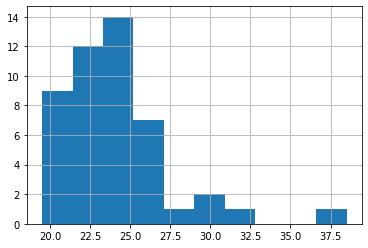

In [115]:
compact_cars_mileage = compact_cars.avg_mpg.hist()

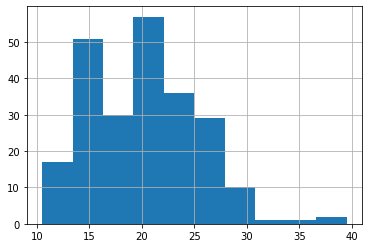

In [105]:
overall_mileage = mpg_df.avg_mpg.hist()

**Set alpha**

In [108]:
alpha = 0.05

**Verify Assumptions**

In [109]:
compact_cars.size

564

In [110]:
mpg_df.size

2808

The sizes of both dataframe as large enough for us to assume normality.

**Compute p value and test statistic**

In [112]:
mean_for_all_cars = mpg_df.avg_mpg.mean()
mean_for_all_cars

20.14957264957265

In [118]:
t, p = stats.ttest_1samp(compact_cars.avg_mpg, mean_for_all_cars)
print("T statistic:", t)
print("p-value:", p/2)
print("alpha:", alpha)

T statistic: 7.896888573132535
p-value: 2.0992818971585668e-10
alpha: 0.05


**We will make a conclusion based on our data**

In [119]:
print("Is p-value significant?", p/2 < alpha)
print("Is t-statistic greater than 0?", t > 0)

Is p-value significant? True
Is t-statistic greater than 0? True


Is $\frac{1}{2} p < \alpha$ and $t > 0$? 

Is $t > 0$ and $\frac{1}{2}p < \alpha$?

In [120]:
if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject the null hypothesis.")
    print("In fact, the mpg of compact cars is less than the average mpg of all cars.")
else:
    print("We reject $H_{0}.")
    print("The fuel efficiency of compact cars is likely better than the average fuel efficiency for all cars.")

We reject $H_{0}.
The fuel efficiency of compact cars is likely better than the average fuel efficiency for all cars.


We have high confidence that the mean miles per gallon of compact cars is greater than the mean miles per gallon of all cars. 

### Part 3

Do manual cars get better gas mileage than automatic cars?

**Format the hypotheses**

$H_{0}:$ The average miles per gallon of manual cars is less than or equal to the average miles per gallon of automatic cars. 

$H_{a}:$ The average miles per gallon of manual cars is greater than the average miles per gallon of automatic cars.

**Get data**

In [133]:
auto_cars = mpg_df['trans'].str.startswith('a')

In [132]:
manual_cars = mpg_df['trans'].str.startswith('m')

In [134]:
automatic = mpg_df[auto_cars]

In [135]:
manual = mpg_df[manual_cars]

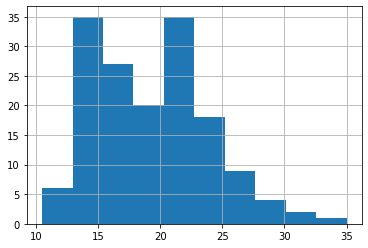

In [137]:
automatic_historgram = automatic.avg_mpg.hist()

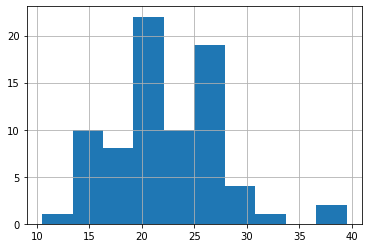

In [138]:
manual_histogram = manual.avg_mpg.hist()

**Set alpha**

In [139]:
alpha = 0.05

**Verify assumptions**

In [140]:
automatic.size

1884

In [141]:
manual.size

924

1. Independent Samples. No observations in the automatic sample exist in the manual sample. 

2. Both of our data sets are large enough for us to assume normality.

3. Equal Variances (we have an argument that can handle unequal variances).

In [143]:
print("Variance for churn sample:", automatic.avg_mpg.var())
print("Variance for no churn sample:", manual.avg_mpg.var())

Variance for churn sample: 21.942777233382337
Variance for no churn sample: 26.635167464114826


These variances are not equal, so we use set equal_var to False.

**Compute test statistic and p value**

In [149]:
t, p = stats.ttest_ind(manual.avg_mpg, automatic.avg_mpg, equal_var = False)

In [150]:
print("T-statistic:", t)
print("P-value:", p/2)

T-statistic: 4.443514012903071
P-value: 8.976124499958965e-06


**Reach conclusion**

In [151]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [153]:
if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject the null hypothesis.")
else:
    print("We reject the null hypothesis.")

We reject the null hypothesis.


We have high confidence that the average miles per gallon for manual cars is greater than the average miles per gallon of automatic cars.